In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
# reag_quant = [100, 30, 45]
# state_change_vect = [[-1, 0, +1],
#                      [+1, 0, +2],
#                      [0, -1, +1],
#                      [0, +1, -1]]
# combinatorics = [lambda a,b,x : a*x*(x-1)/2,
#                 lambda a,b,x : (x*(x-1)*(x-2))/6,
#                 lambda a,b,x : b,
#                 lambda a,b,x : x]

# # calcola propensity funct
# # calcola cumulative propensity funct
# # calcola tau
# # calcola mu
# time = 0
# total_time = 100


def calculate_propensity_funct(reag_quant : list, combinatorics : list) -> list:
    propensity_list = []
    for funct in combinatorics:
        prop = funct(*reag_quant)
        propensity_list.append(prop)
    return propensity_list

# prop_list = calculate_propensity_funct(reag_quant, combinatorics)

# cumulative_propensity = sum(calculate_propensity_funct(reag_quant,combinatorics))

def calculate_tau(cumulative_propensity: float) -> float:
    r1 = np.random.uniform(0,1)
    tau = (1/cumulative_propensity)*(np.log(1/r1))
    return tau

def calculate_mu(propensity_list: list, cumulative_propensity: float) -> int:
    r2 = np.random.uniform(0,1)
    propensity_progressive_sum = 0
    threshold = r2*cumulative_propensity
    #print(threshold)
    for index, reaction_propensity in enumerate(propensity_list):
        propensity_progressive_sum += reaction_propensity
        if propensity_progressive_sum > threshold:
            return index
        else:
            pass
        
# tau = calculate_tau(cumulative_propensity)

# time += tau

# mu = calculate_mu(prop_list, cumulative_propensity)

# reag_quant = [i + e for i, e in zip(reag_quant, state_change_vect[mu])]




In [146]:
#import stochastic_backend

class gillespie_ssa():
    
    def __init__(self,
                 reagent_quantity:list,
                 state_change_vectors:list,
                 combinatorics,
                 time=False,
                 iteration:int = 100,
                 set_fixed_reagents=False):
        
        self.actual_reagent_quantity = reagent_quantity
        molecular_species_history = []
        molecular_species_history.append(reagent_quantity)
        self.molecular_species_history = molecular_species_history
        self.state_change_vectors = state_change_vectors
        self.reactions_combinatorics = combinatorics
        if time:
            self.total_time = time
        self.actual_time = 0
        self.timestep_list = []
        self.timestep_list.append(self.actual_time)
        self.max_iteration = iteration
        self.actual_iteration = 0
        
        
        while self.actual_iteration < self.max_iteration:
            
            propensity_function_list = calculate_propensity_funct(reag_quant=self.actual_reagent_quantity, combinatorics=self.reactions_combinatorics)
            if 0 in set(propensity_function_list):
                print('A reagent reached 0')
                break                
            cumulative_propensity = sum(propensity_function_list)
            if cumulative_propensity == 0:
                break
            tau = calculate_tau(cumulative_propensity)
            self.actual_time += tau
            self.timestep_list.append(self.actual_time)
            mu = calculate_mu(propensity_list=propensity_function_list, cumulative_propensity=cumulative_propensity)
            #mu = random.choices(self.state_change_vectors,propensity_function_list)[0]
            #print(mu)
            #self.actual_reagent_quantity = [i+e for i,e in zip(self.actual_reagent_quantity, mu)]
            self.actual_reagent_quantity = [i+e for i,e in zip(self.actual_reagent_quantity, self.state_change_vectors[mu])]
            if set_fixed_reagents:
                for index in set_fixed_reagents:
                    self.actual_reagent_quantity[index] = self.molecular_species_history[0][index]
            self.molecular_species_history.append(self.actual_reagent_quantity)
            self.actual_iteration += 1

In [147]:
propensity_function_list = calculate_propensity_funct(reag_quant=reag_quant, combinatorics=combinatorics)


In [148]:
propensity_function_list

[99000.0, 161700.0, 100, 100]

In [149]:
random.choices(state_change_vect,propensity_function_list)[0]

[1, 0, -1]

In [144]:
# data for schogle | NOT WORKING

reag_quant = [20, 100, 100]
state_change_vect = [[-1, 0, +1],
                     [+1, 0, -1],
                     [0, -1, +1],
                     [0, +1, -1]]
combinatorics = [lambda a,b,x : a*x*(x-1)/2,
                lambda a,b,x : (x*(x-1)*(x-2))/6,
                lambda a,b,x : b,
                lambda a,b,x : x]

In [ ]:
# data for lotka volterra

# prey food production
zero = 0.5
# reproduction rate prey
alpha = 1
# prey consumption rate, and reproduction of predator
beta = 0.01
# death of predator
gamma = 2
prey = 100
predator = 100

reag_quant = [prey,predator]
state_change_vect = [[1,0],
                     [-1,1],
                     [0,-1]]
combinatorics = [lambda prey,pred : prey,
                lambda prey,pred : prey*pred,
                lambda prey,pred : pred]


In [ ]:
alpha = 1  # reproduction rate of prey
beta = 0.01  # prey consumption rate (and reproduction of predator)
gamma = 2  # death rate of predators
t = 15  # duration

reag_quant = [50, 50]  # prey, predators

propensities = [lambda prey, pred: alpha * prey,  # prey birth
                lambda prey, pred: beta * prey * pred,  # prey death / predator birth
                lambda prey, pred: gamma * pred]  # predator death

state_change_vect = [[1, 0],  # prey birth
                 [-1, 1],  # prey death / predator birth
                 [0, -1]]  # predator death

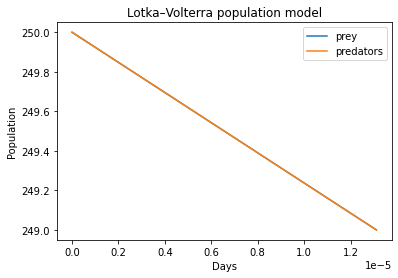

In [14]:
import random

alpha = 1  # reproduction rate of prey
beta = 0.01  # prey consumption rate (and reproduction of predator)
gamma = 2  # death rate of predators
t = 0.0000001  # duration

# initials = [50, 50]  # prey, predators

# propensities = [lambda prey, pred: alpha * prey,  # prey birth
#                 lambda prey, pred: beta * prey * pred,  # prey death / predator birth
#                 lambda prey, pred: gamma * pred]  # predator death

# stoichiometry = [[1, 0],  # prey birth
#                  [-1, 1],  # prey death / predator birth
#                  [0, -1]]  # predator death

initials = [100000, 200000, 250]
stoichiometry = [[-1, 0, +1],
                     [+1, 0, -1],
                     [0, -1, +1],
                     [0, +1, -1]]
propensities = [lambda a,b,x : (a*x*(x-1)/2)*0.000003,
                lambda a,b,x : ((x*(x-1)*(x-2))/6)*0.0004,
                lambda a,b,x : b*0.001,
                lambda a,b,x : x*3.5]

def simulate(initials, propensities, stoichiometry, duration):
    """
    Run a simulation with given model.
    :param initials: List of initial population counts.
    :param propensities: List of functions that take population counts and give transition rates.
    :param stoichiometry: List of integers, how the population counts change per transition.
    :param duration: Maximum simulation time.
    :return: Two lists: The time points and population counts per time point.
    """

    # initial values
    times = [0.0]
    counts = [initials]

    # while finish time has not been reached
    while times[-1] < duration:
        # get current state
        state = counts[-1]

        # calculate rates with respective propensities
        rates = [prop(*state) for prop in propensities]

        # stop loop if no transitions available
        if all(r == 0 for r in rates):
            break

        # randomly draw one transition
        transition = random.choices(stoichiometry, weights=rates)[0]
        next_state = [a + b for a, b in zip(state, transition)]

        # draw next time increment from random exponential distribution
        # dt = math.log(1.0 / random.random()) / sum(weights)
        dt = random.expovariate(sum(rates))

        # append new values
        times.append(times[-1] + dt)
        counts.append(next_state)

    return times, counts

t, PP = simulate(initials, propensities, stoichiometry, t)

a,b,c= zip(*PP)

plt.plot(t, c, label="prey")
plt.plot(t, c, label="predators")

plt.title("Lotka–Volterra population model")
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend()

In [ ]:
PP[10]


In [ ]:
result_dict ={}
for epoch in range(10):
    
    a = gillespie_ssa(reagent_quantity=reag_quant, state_change_vectors=state_change_vect, combinatorics=combinatorics, iteration=1000000)
    result_dict[epoch] = [a.timestep_list, a.molecular_species_history]
    plt.plot([x for x in a.timestep_list],[y[0] for y in a.molecular_species_history])
    plt.plot([x for x in a.timestep_list],[y[1] for y in a.molecular_species_history])

In [ ]:
a.molecular_species_history[250]

In [ ]:
result_dict[0]

In [ ]:
result_dict[0]

In [68]:
3*10e-8

3e-07

In [150]:
# data for schogle |  WORKING!!!!!!!!!!!!!!!!!!!!!!

reag_quant = [100000, 200000, 250]
state_change_vect = [[-1, 0, +1],
                     [+1, 0, -1],
                     [0, -1, +1],
                     [0, +1, -1]]
combinatorics = [lambda a,b,x : (3*10e-8*a*x*(x-1)/2),
                lambda a,b,x : (0.0001*x*(x-1)*(x-2)/6),
                lambda a,b,x : b*0.001,
                lambda a,b,x : x*3.5]

In [151]:
propensity_function_list = calculate_propensity_funct(reag_quant=reag_quant, combinatorics=combinatorics)

In [152]:
propensity_function_list

[933.75, 257.3, 200.0, 875.0]

<IPython.core.display.Javascript object>


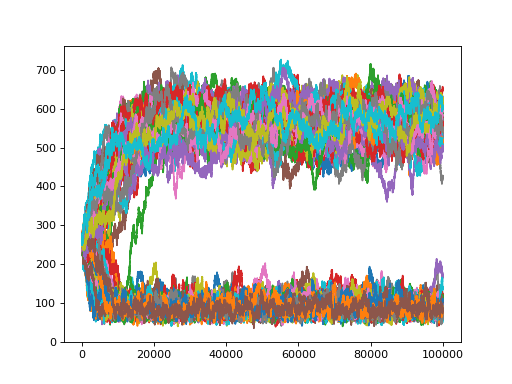

In [153]:
result_dict ={}
for epoch in range(100):
    
    a = gillespie_ssa(reagent_quantity=reag_quant, state_change_vectors=state_change_vect, combinatorics=combinatorics, iteration=100000, set_fixed_reagents=[0,1])
    result_dict[epoch] = [a.timestep_list, a.molecular_species_history]
    plt.plot([x for x in range(a.actual_iteration+1)],[y[2] for y in a.molecular_species_history])
    #plt.plot([x for x in a.timestep_list],[y[1] for y in a.molecular_species_history])

In [109]:
result_dict[50][1][100000]

[100000, 200000, 520]

In [128]:
result_dict[50][1]

[[100000, 200000, 250],
 [100000, 200000, 249],
 [100000, 200000, 248],
 [100000, 200000, 249],
 [100000, 200000, 248],
 [100000, 200000, 249],
 [100000, 200000, 248],
 [100000, 200000, 249],
 [100000, 200000, 250],
 [100000, 200000, 251],
 [100000, 200000, 250],
 [100000, 200000, 249],
 [100000, 200000, 248],
 [100000, 200000, 249],
 [100000, 200000, 250],
 [100000, 200000, 249],
 [100000, 200000, 248],
 [100000, 200000, 249],
 [100000, 200000, 250],
 [100000, 200000, 251],
 [100000, 200000, 252],
 [100000, 200000, 251],
 [100000, 200000, 252],
 [100000, 200000, 253],
 [100000, 200000, 254],
 [100000, 200000, 255],
 [100000, 200000, 254],
 [100000, 200000, 255],
 [100000, 200000, 254],
 [100000, 200000, 253],
 [100000, 200000, 254],
 [100000, 200000, 253],
 [100000, 200000, 252],
 [100000, 200000, 253],
 [100000, 200000, 252],
 [100000, 200000, 251],
 [100000, 200000, 252],
 [100000, 200000, 253],
 [100000, 200000, 254],
 [100000, 200000, 255],
 [100000, 200000, 254],
 [100000, 200000

<IPython.core.display.Javascript object>


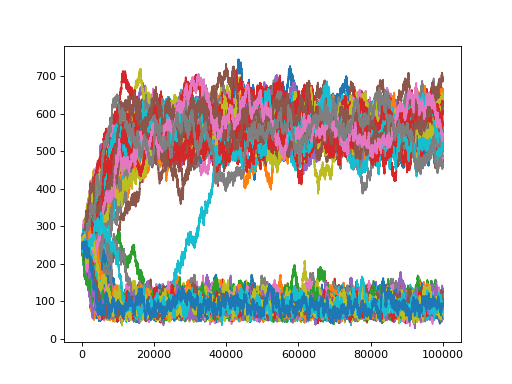

In [126]:
plt.plot(x,y) 

In [122]:
len(result_dict[50][0])

100001

In [124]:
x=np.linspace(0,len(result_dict[50][0]),len(result_dict[50][0]))

In [125]:
x.shape

(100001,)

In [118]:
y = [i[2] for i in result_dict[50][1]]

In [ ]:
result_dict[54]

In [95]:
%matplotlib notebook

In [ ]:
result_dict[0][1]

In [ ]:
a.molecular_species_history

In [ ]:
plt.plot([x for x in a.timestep_list],[y[2] for y in a.molecular_species_history])

In [ ]:
cumulative_propensity

In [ ]:
prop_list

In [ ]:
tau = calculate_tau(cumulative_propensity)

In [ ]:
tau

In [ ]:
mu

In [ ]:
reag_quant + state_change_vect[0]

In [ ]:
[i + e for i, e in zip(reag_quant, state_change_vect[0])]

In [ ]:
combinatorics[0](reag_quant[0],reag_quant[1],reag_quant[2])

In [ ]:
a = map(combinatorics,reag_quant)

In [ ]:
combinatorics[0](*reag_quant)

In [ ]:
[i for i in reag_quant]

In [ ]:
sum(calculate_propensity_funct(reag_quant,combinatorics))

In [ ]:
np.random.uniform(0,1,2)

In [ ]:
test = np.random.uniform(0,1,(100,100))

In [ ]:
np.sort(test)

In [ ]:
plt.imshow(np.sort(np.random.uniform(0,1,(100,100))))

In [ ]:
plt.imshow(np.sort(np.random.uniform(0,1,(100,100))))